# Conclusions and Next Steps
Summarize findings here

In [1]:
import torch
import os
from tqdm.notebook import tqdm as tqdm
import pandas as pd
import json

import warnings
warnings.filterwarnings("ignore")

from myhelpers import config_plots, TrialStatistics
from HGNN.train.configParser import getModelName, ConfigParser
from HGNN.train import CNN

config_plots.global_settings()

In [2]:
experimentsPath="/home/elhamod/HGNN/experiments/"
dataPath="/data/BGNN_data"

experiment_list = [
    {
       'experimentName': "biology_paper_datasizes",
       'experimentHash': ['e6a66635555bc1eb38ec09fe1752fa0b94da37f56227eb354bf4d077'] # None means all experiment hashes. Otherwise, a list of hashes
    },
    {
       'experimentName': "biology_paper_unsupervised",
       'experimentHash': None
    },
]

cuda=7

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 7


In [4]:
full_df = pd.DataFrame()

for entry in experiment_list:
    experimentName = entry["experimentName"]
    experimentHashes = entry["experimentHash"]

    config_parser = ConfigParser(experimentsPath, dataPath, experimentName)

    df_path = os.path.join(experimentsPath, experimentName, "results", "raw_experiments.csv")
    df = pd.read_csv(df_path)

    paramsIterator = config_parser.getExperiments()  
    number_of_experiments = sum(1 for e in paramsIterator)  

    for experiment_params in config_parser.getExperiments():

        # get data frame
        experimentHash_ = TrialStatistics.getTrialName(experiment_params)
        if (experimentHashes is None) or (experimentHash_ in experimentHashes):
            df_rows = df[df['experimentHash'] == experimentHash_]
            full_df = pd.concat([full_df, df_rows])

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
full_df

,Unnamed: 0,image_path,suffix,img_res,augmented,batchSize,learning_rate,numOfTrials,fc_layers,modelType,lambda,unsupervisedOnTest,tl_model,link_layer,loss,average correct guess prob,macro f1 test fine,macro f1 test coarse,macro f1 validation fine,time,epochs,top-3,top-5,experimentHash,trial,trialHash
6,6,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,False,ResNet18,avgpool,3.243850,0.424087,0.858355,0.972760,0.837166,3305.285958,33.0,95.526320,96.052635,e6a66635555bc1eb38ec09fe1752fa0b94da37f56227eb...,0,710de2ce3b48a0480d4a481a695de1c0b2b8d5a8d21c10...
7,7,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,False,ResNet18,avgpool,3.246876,0.421074,0.829184,0.962199,0.835752,3231.806586,33.0,96.052635,97.368420,e6a66635555bc1eb38ec09fe1752fa0b94da37f56227eb...,1,1aa7a310491de3c0ed22afcd6fbbf0ce7654593fe16c5e...
8,8,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,False,ResNet18,avgpool,3.252557,0.415396,0.825587,0.881341,0.816879,2300.739032,24.0,94.473690,96.578950,e6a66635555bc1eb38ec09fe1752fa0b94da37f56227eb...,2,2f023c9d174ce312a0281280f87cadafff1b765183e210...
0,0,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,True,ResNet18,avgpool,3.151642,0.518440,0.845327,1.000000,0.834304,15293.560809,53.0,95.263160,97.368420,94c263280bddd67abae5c766700cf51eaa6cc6e42fbb52...,0,42f0c5e204612efc2f3d30a4e78c4c94b0ce6dd59e96a7...
1,1,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,True,ResNet18,avgpool,3.071465,0.600380,0.875579,1.000000,0.885202,40428.896744,140.0,96.842110,98.157900,94c263280bddd67abae5c766700cf51eaa6cc6e42fbb52...,1,bf46475bb64bc105ecedd18e0003ff6b249a49cf16e9d0...
2,2,INHS_cropped,biology_paper_cleaned_50max,448,True,64,0.00005,3,1,HGNN_add,0.6,True,ResNet18,avgpool,3.191891,0.477282,0.836132,1.000000,0.823229,7434.191380,27.0,94.210530,96.315796,94c263280bddd67abae5c766700cf51eaa6cc6e42fbb52...,2,128e1b900a1cc9e1d08ad50c06187ed5d7a4eb930634c2...


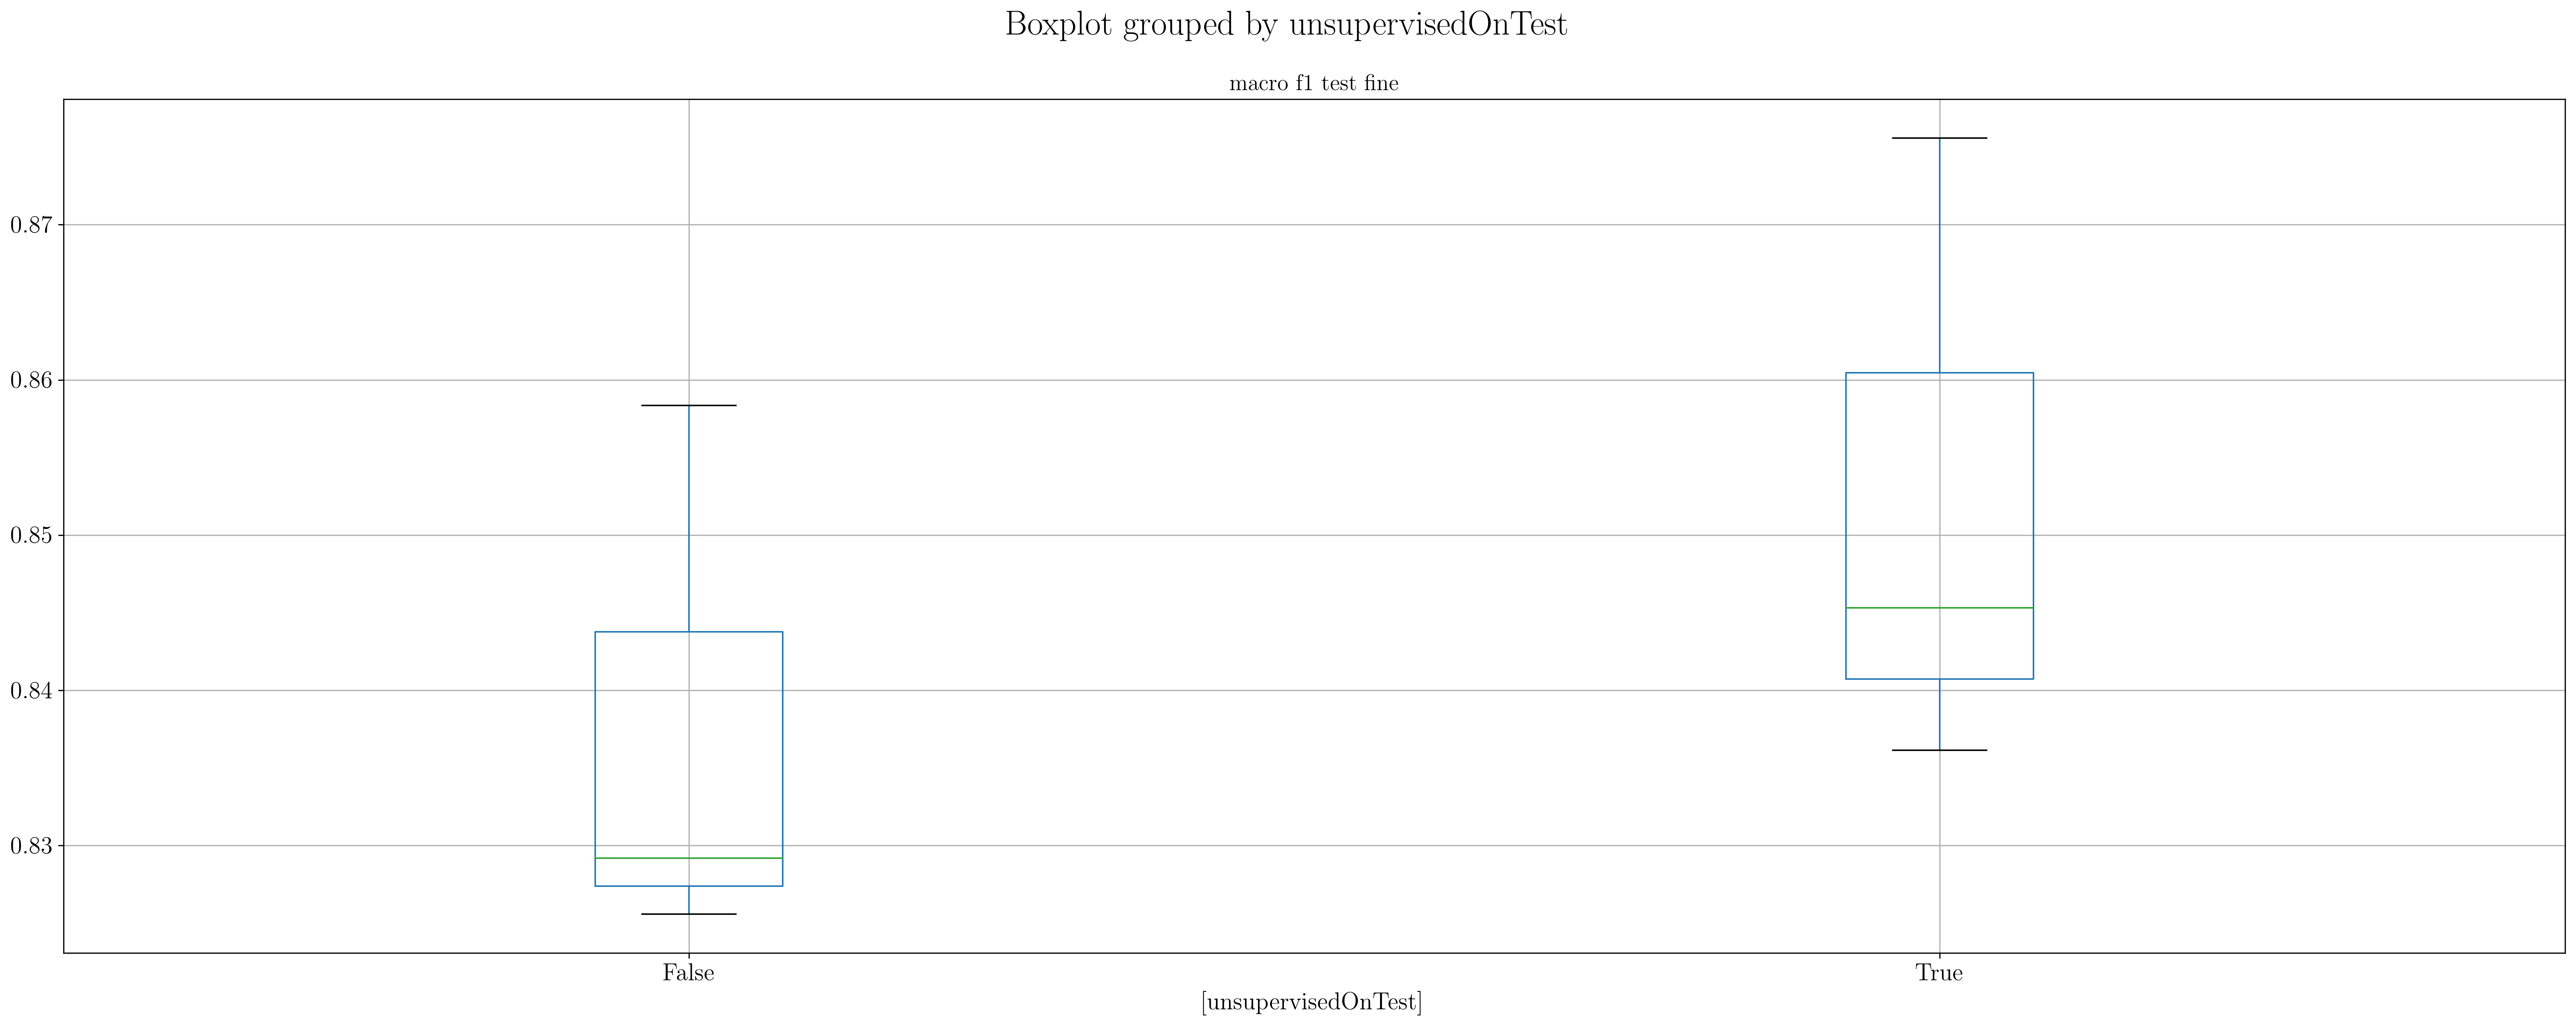

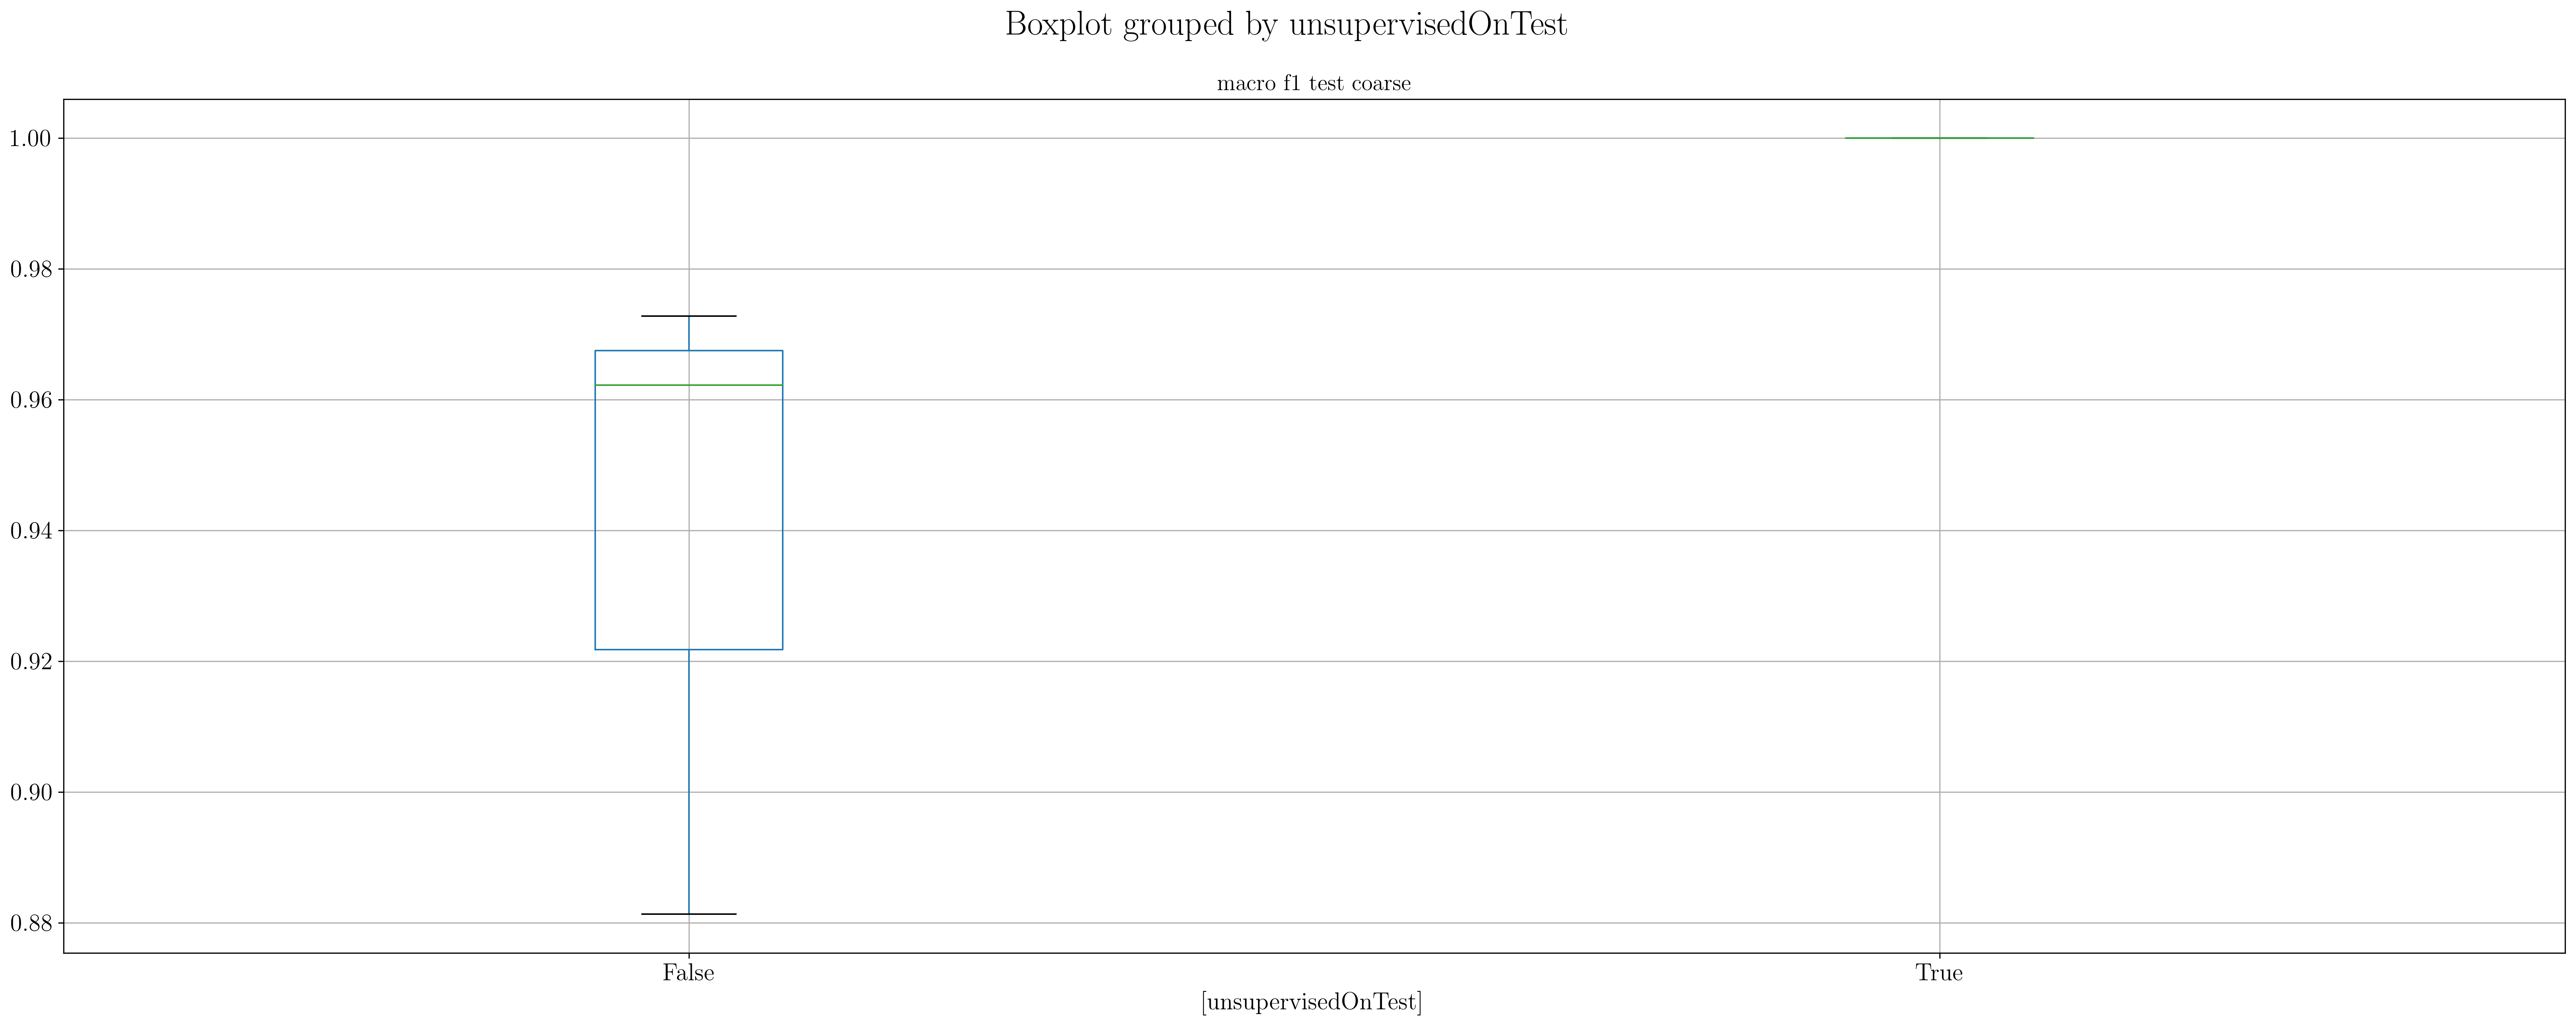

In [7]:
dir_ = os.path.join(experimentsPath, 'figures', 'biologypaper', 'comaprison_unsupervised')
TrialStatistics.pandasBoxplot(full_df, ['macro f1 test fine'], ['unsupervisedOnTest'], dir_, saveFig=True, figsize=(24, 10))
TrialStatistics.pandasBoxplot(full_df, ['macro f1 test coarse'], ['unsupervisedOnTest'], dir_, saveFig=True, figsize=(24, 10))


with open(os.path.join(dir_, 'experiments.json'), 'w') as f:
    json.dump(experiment_list, f)
